# Linear Regression

The `lm()` class makes it easy to work with regression models estimated via Ordinary-Least-Squares (OLS)


**Core Methods and Attributes**  

| Method | Description |
|--------|-------------|
| [`.fit()`](../api/models/lm.md#pymer4.models.lm.lm.fit) | Fit a model using `lm()` in R |
| [`.summary()`](../api/models/lm.md#pymer4.models.base.model.summary) | Get a nicely formatted table containing `.result_fit` |
| [`.empredict()`](../api/models/lm.md#pymer4.models.base.model.empredict) | Compute marginal predictions are arbitrary values of predictors |
| [`.simulate()`](../api/models/lm.md#pymer4.models.base.model.simulate) | Simulate new observations from the fitted model |
| [`.predict()`](../api/models/lm.md#pymer4.models.base.model.predict) | Make predictions given a new dataset |

Models always store the results of their last estimation as `polars` Dataframes in the following attributes:

| Attribute | Stores |
|--------|-------------|
| `.params`| parameter estimates |
| `.result_fit`| parameter estimates, errors, & inferential statistics |
| `.result_fit_stats`| model fit statistics |
| `.result_anova`| ANOVA table (next tutorial) |


In [1]:
from pymer4.models import lm
from pymer4 import load_dataset
import seaborn as sns

data = load_dataset("advertising")
data.head()

tv,radio,newspaper,sales
f64,f64,f64,f64
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,9.3
151.5,41.3,58.5,18.5
180.8,10.8,58.4,12.9


## Univariate regression

Let's fit a model to estimate the following relationship:

$$ Sales \sim \beta_0 + \beta_1 * \text{TV Ad Spending} $$

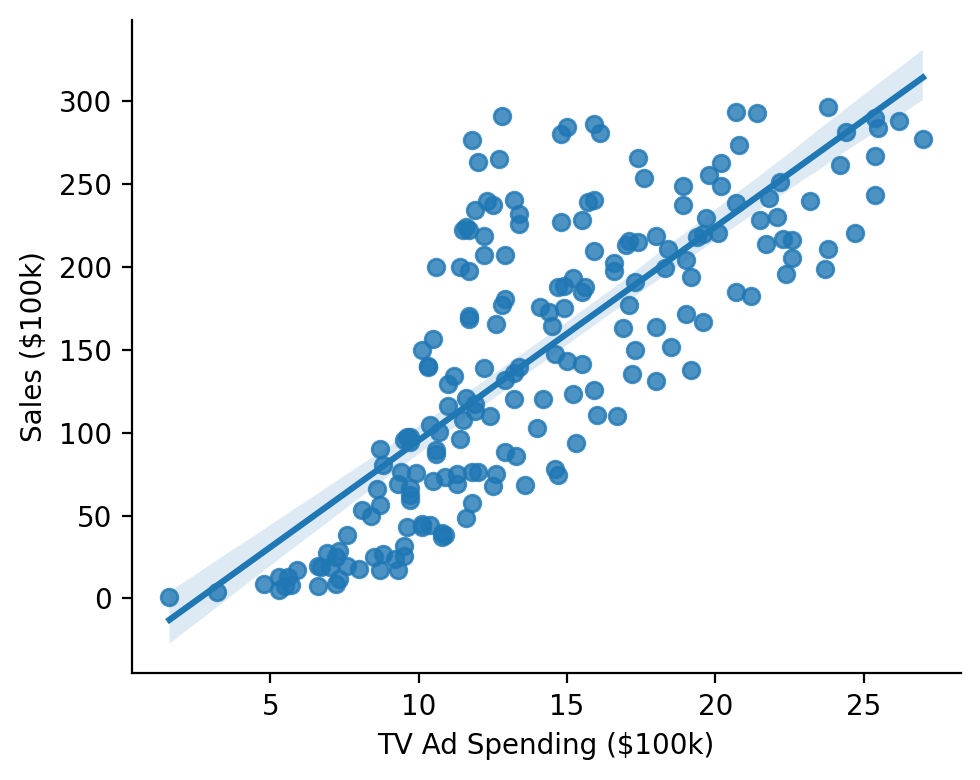

In [2]:
grid = sns.lmplot(x="sales", y="tv", data=data, height=4, aspect=1.25)
grid.set_axis_labels("TV Ad Spending ($100k)", "Sales ($100k)")
sns.despine();

We initialize a model with a *formula* and a *dataframe* and call its `.fit` method.

Using `summary=True` will return a nicely-formatted [table](https://posit-dev.github.io/great-tables/articles/intro.html)

In [3]:
model = lm("sales ~ tv", data=data)
model.fit(summary=True)

GT(_tbl_data=shape: (2, 9)
┌─────────────┬──────────┬───────────┬──────────┬───┬───────────┬─────┬─────────┬───────┐
│ term        ┆ estimate ┆ std_error ┆ conf_low ┆ … ┆ t_stat    ┆ df  ┆ p_value ┆ stars │
│ ---         ┆ ---      ┆ ---       ┆ ---      ┆   ┆ ---       ┆ --- ┆ ---     ┆ ---   │
│ str         ┆ f64      ┆ f64       ┆ f64      ┆   ┆ f64       ┆ i64 ┆ str     ┆ str   │
╞═════════════╪══════════╪═══════════╪══════════╪═══╪═══════════╪═════╪═════════╪═══════╡
│ (Intercept) ┆ 7.032594 ┆ 0.457843  ┆ 6.129719 ┆ … ┆ 15.360275 ┆ 198 ┆ <.001   ┆ ***   │
│ tv          ┆ 0.047537 ┆ 0.002691  ┆ 0.042231 ┆ … ┆ 17.667626 ┆ 198 ┆ <.001   ┆ ***   │
└─────────────┴──────────┴───────────┴──────────┴───┴───────────┴─────┴─────────┴───────┘, _body=<great_tables._gt_data.Body object at 0x30c2d4920>, _boxhead=Boxhead([ColInfo(var='term', type=<ColInfoTypeEnum.stub: 2>, column_label='term', column_align='left', column_width=None), ColInfo(var='estimate', type=<ColInfoTypeEnum.default: 1>, column_label='Estimate', column_align='right', column_width=None), ColInfo(var='std_error', type=<ColInfoTypeEnum.default: 1>, column_label='SE', column_align='right', column_width=None), ColInfo(var='conf_low', type=<ColInfoTypeEnum.default: 1>, column_label='CI-low', column_align='right', column_width=None), ColInfo(var='conf_high', type=<ColInfoTypeEnum.default: 1>, column_label='CI-high', column_align='right', column_width=None), ColInfo(var='t_stat', type=<ColInfoTypeEnum.default: 1>, column_label='T-stat', column_align='right', column_width=None), ColInfo(var='df', type=<ColInfoTypeEnum.default: 1>, column_label='df', column_align='right', column_width=None), ColInfo(var='p_value', type=<ColInfoTypeEnum.default: 1>, column_label='p', column_align='left', column_width=None), ColInfo(var='stars', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x30c5d1670>, _spanners=Spanners([]), _heading=Heading(title='Formula: lm(sales~tv)', subtitle=Md(text='Number of observations: *200*  \n            Confidence intervals: *parametric*  \n            ---------------------  \n            R-squared: *0.6119*  \n            R-squared-adj: *0.6099*  \n            *F(1, 198) = 312.145, p = <.001*  \n            Log-likelihood: *-519*  \n            AIC: *1044* | BIC: *1053*  \n            Residual error: *3.259*  \n        '), preheader=None), _stubhead=None, _source_notes=[Md(text='Signif. codes: *0 *** 0.001 ** 0.01 * 0.05 . 0.1*')], _footnotes=[], _styles=[StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=0, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=1, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)])], _locale=<great_tables._gt_data.Locale object at 0x30c592120>, _formats=[<great_tables._gt_data.FormatInfo object at 0x177180e90>, <great_tables._gt_data.FormatInfo object at 0x30c49a990>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table

All estimation **results** are always stored *within* the model and accessible as a dataframe 

In [4]:
model.result_fit

term,estimate,std_error,conf_low,conf_high,t_stat,df,p_value
str,f64,f64,f64,f64,f64,i64,f64
"""(Intercept)""",7.032594,0.457843,6.129719,7.935468,15.360275,198,1.4063e-35
"""tv""",0.047537,0.002691,0.042231,0.052843,17.667626,198,1.4674e-42


Result **fit statistics** (presented in the summary) are also stored within the model

In [5]:
model.result_fit_stats

r_squared,adj_r_squared,sigma,statistic,p_value,df,logLik,AIC,BIC,deviance,df_residual,nobs
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64
0.611875,0.609915,3.258656,312.144994,1.4674e-42,1.0,-519.045664,1044.091328,1053.98628,2102.530583,198,200


Models conventiently keep track of the **data** use for estimation and *augment* this dataframe with additional columns of observation level residuals, predictions, and additional fit statistics

In [6]:
model.data.head()

tv,radio,newspaper,sales,fitted,resid,hat,sigma,cooksd,std_resid
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
230.1,37.8,69.2,22.1,17.970775,4.129225,0.009703,3.253513,0.007943,1.273349
44.5,39.3,45.1,10.4,9.147974,1.252026,0.012169,3.265684,0.00092,0.386575
17.2,45.9,69.3,9.3,7.850224,1.449776,0.016494,3.265256,0.001688,0.448615
151.5,41.3,58.5,18.5,14.234395,4.265605,0.005014,3.252678,0.004339,1.312301
180.8,10.8,58.4,12.9,15.627218,-2.727218,0.005777,3.261099,0.002047,-0.839343


This makes it easy to visually inspect fits

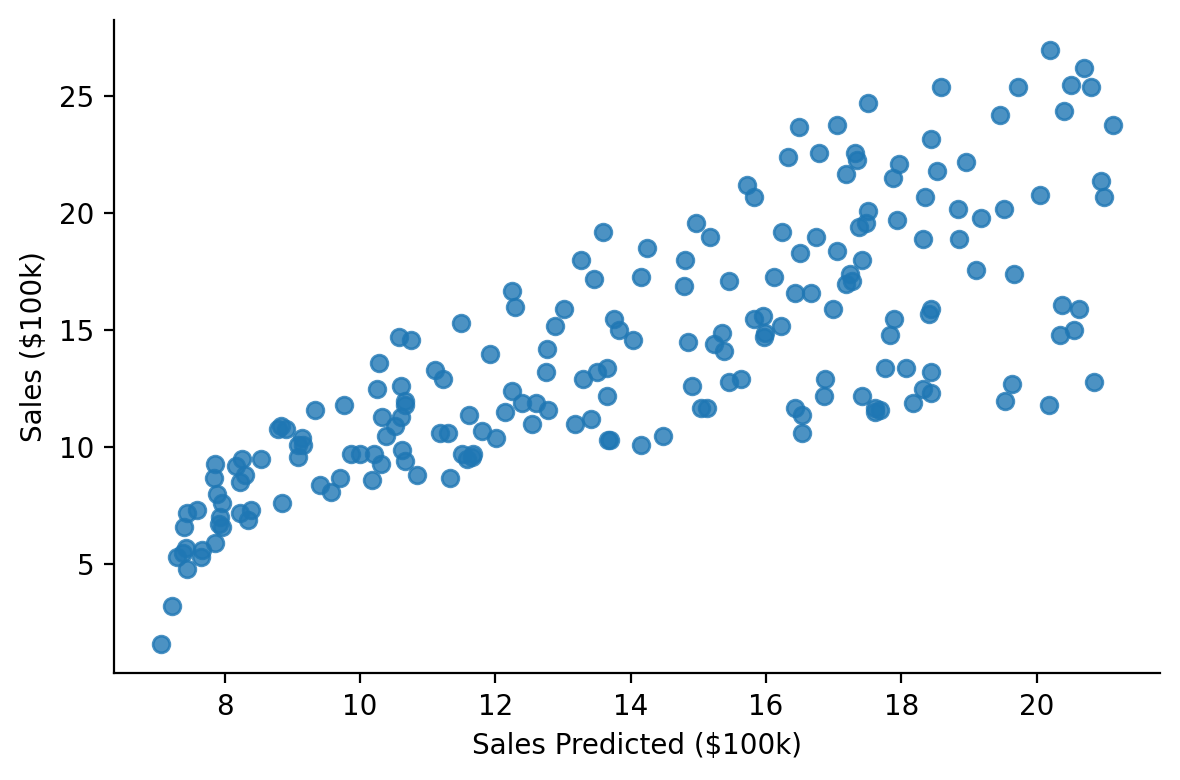

In [7]:
grid = sns.lmplot(x="fitted", y="sales", fit_reg=False, data=model.data, height=4, aspect=1.5)
grid.set_axis_labels("Sales Predicted ($100k)", "Sales ($100k)")
sns.despine();

And model residuals

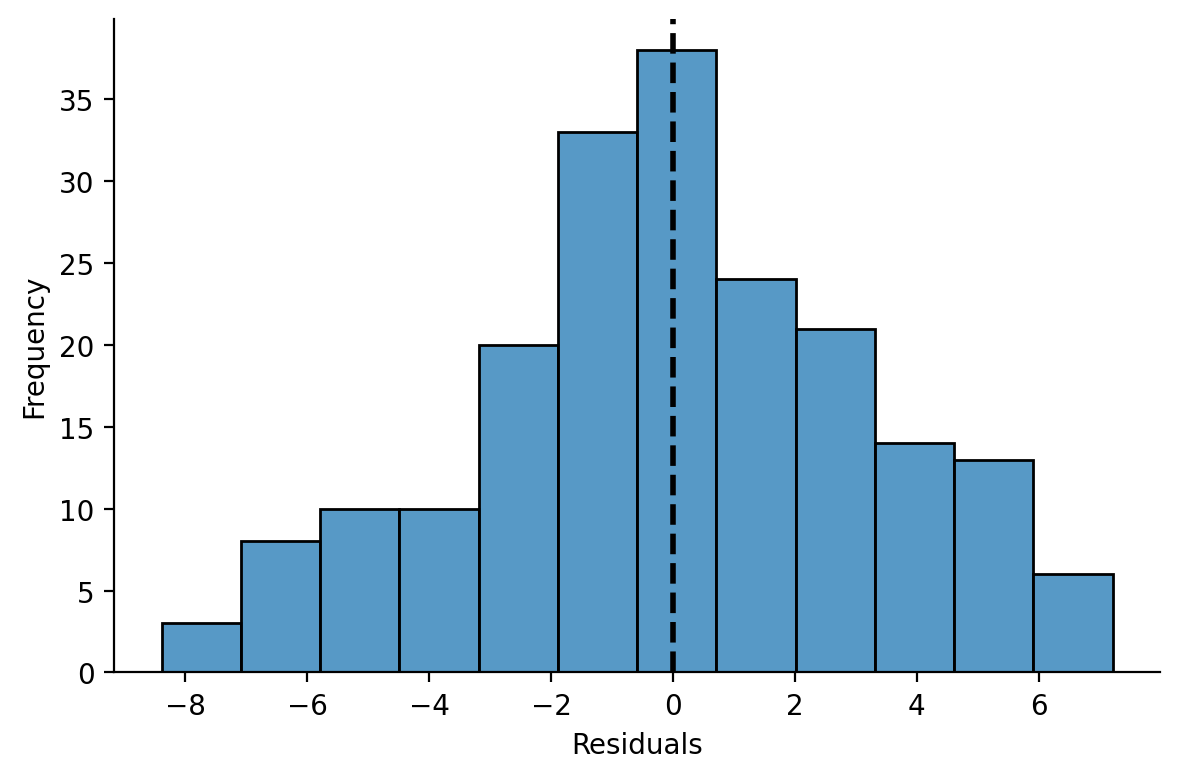

In [8]:
grid = sns.displot(x="resid", data=model.data, height=4, aspect=1.5)
grid.set_axis_labels("Residuals", "Frequency")
grid.ax.axvline(0, color="k", linestyle="--", linewidth=2)
sns.despine();

## Multiple Regression

Let's extend our model to estimate a multiple regression using another continous predictor

$$ Sales \sim \beta_0 + \beta_1 * \text{TV Ad Spending} + \beta_2 * \text{Radio Ad Spending}$$


In [9]:
model = lm("sales ~ tv + radio", data=data)
model.fit(summary=True)

GT(_tbl_data=shape: (3, 9)
┌─────────────┬──────────┬───────────┬──────────┬───┬───────────┬─────┬─────────┬───────┐
│ term        ┆ estimate ┆ std_error ┆ conf_low ┆ … ┆ t_stat    ┆ df  ┆ p_value ┆ stars │
│ ---         ┆ ---      ┆ ---       ┆ ---      ┆   ┆ ---       ┆ --- ┆ ---     ┆ ---   │
│ str         ┆ f64      ┆ f64       ┆ f64      ┆   ┆ f64       ┆ i64 ┆ str     ┆ str   │
╞═════════════╪══════════╪═══════════╪══════════╪═══╪═══════════╪═════╪═════════╪═══════╡
│ (Intercept) ┆ 2.9211   ┆ 0.29449   ┆ 2.340343 ┆ … ┆ 9.919193  ┆ 197 ┆ <.001   ┆ ***   │
│ tv          ┆ 0.045755 ┆ 0.00139   ┆ 0.043013 ┆ … ┆ 32.908708 ┆ 197 ┆ <.001   ┆ ***   │
│ radio       ┆ 0.187994 ┆ 0.00804   ┆ 0.172139 ┆ … ┆ 23.382446 ┆ 197 ┆ <.001   ┆ ***   │
└─────────────┴──────────┴───────────┴──────────┴───┴───────────┴─────┴─────────┴───────┘, _body=<great_tables._gt_data.Body object at 0x331200620>, _boxhead=Boxhead([ColInfo(var='term', type=<ColInfoTypeEnum.stub: 2>, column_label='term', column_align='left', column_width=None), ColInfo(var='estimate', type=<ColInfoTypeEnum.default: 1>, column_label='Estimate', column_align='right', column_width=None), ColInfo(var='std_error', type=<ColInfoTypeEnum.default: 1>, column_label='SE', column_align='right', column_width=None), ColInfo(var='conf_low', type=<ColInfoTypeEnum.default: 1>, column_label='CI-low', column_align='right', column_width=None), ColInfo(var='conf_high', type=<ColInfoTypeEnum.default: 1>, column_label='CI-high', column_align='right', column_width=None), ColInfo(var='t_stat', type=<ColInfoTypeEnum.default: 1>, column_label='T-stat', column_align='right', column_width=None), ColInfo(var='df', type=<ColInfoTypeEnum.default: 1>, column_label='df', column_align='right', column_width=None), ColInfo(var='p_value', type=<ColInfoTypeEnum.default: 1>, column_label='p', column_align='left', column_width=None), ColInfo(var='stars', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x3311f1520>, _spanners=Spanners([]), _heading=Heading(title='Formula: lm(sales~tv+radio)', subtitle=Md(text='Number of observations: *200*  \n            Confidence intervals: *parametric*  \n            ---------------------  \n            R-squared: *0.8972*  \n            R-squared-adj: *0.8962*  \n            *F(2, 197) = 859.618, p = <.001*  \n            Log-likelihood: *-386*  \n            AIC: *780* | BIC: *793*  \n            Residual error: *1.681*  \n        '), preheader=None), _stubhead=None, _source_notes=[Md(text='Signif. codes: *0 *** 0.001 ** 0.01 * 0.05 . 0.1*')], _footnotes=[], _styles=[StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=0, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=1, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=2, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)])], _locale=<great_tables._gt_data.Locale object at 0x331201580>, _formats=[<great_tables._gt_data.FormatInfo object at 0x17f683a70>, <great_tables._gt_data.FormatInfo object at 0x30c5ba390>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), ta

## Marginal Predictions

When working with multiple predictors it can be helpful to visualize **marginal estimates** to interpret parameters. These are model predictions across values of one predictor while holding another fixed at 1 or more values.

We can use `.empredict()` to generate predictions for specific value combinations of our `tv` and `radio`. Let's use it to explore the relationship between $\text{Sales}$ and $\text{TV Ad Spending}$ *across* different values of $\text{Radio Ad Spending}$. 

Using the `"data"` argument for `tv` tells the model to use all the observed values of that variable in the dataset, so we're generating 3 predictions per data-point: `radio = 0`, `radio = 20` and `radio = 40`

In [10]:
# Predict across the range of observed TV values at Radio values of 0, 20, and 40
marginal_predictions = model.empredict({"tv": "data", "radio": [0, 20, 40]})

We can then visualize these marginal slopes

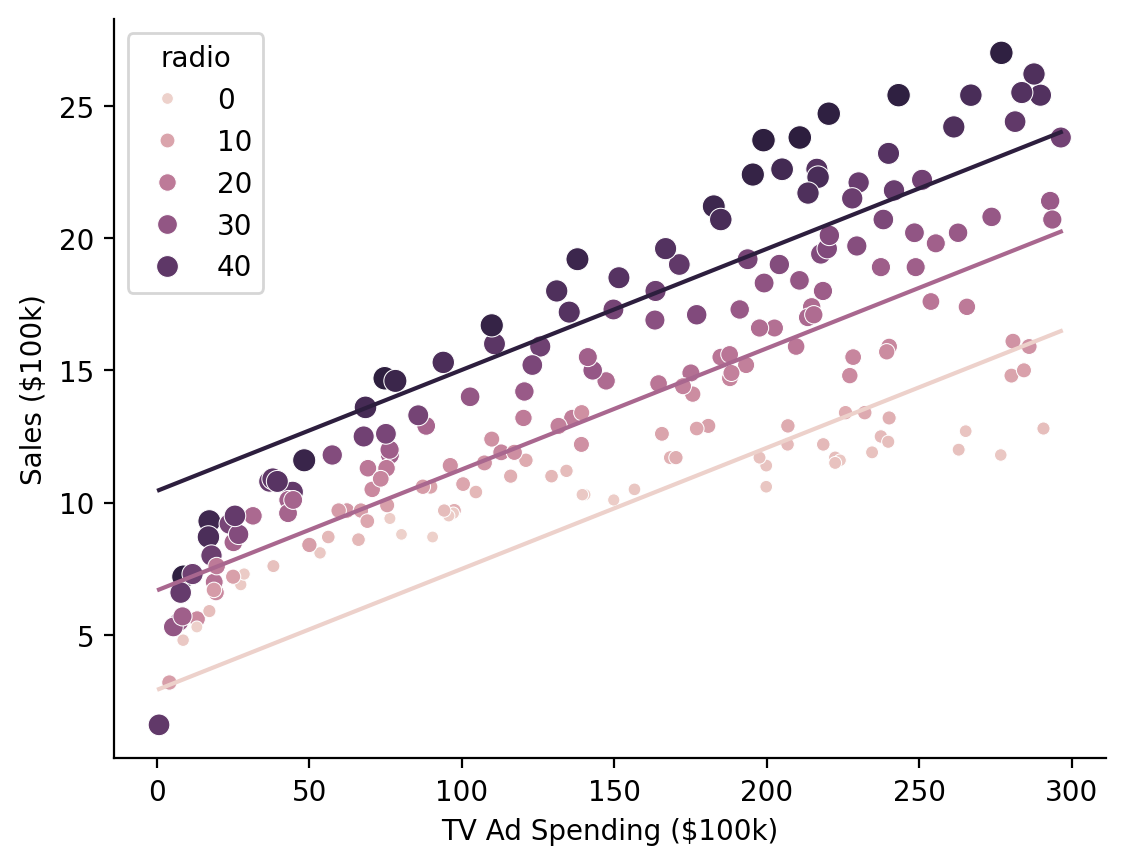

In [11]:
ax = sns.scatterplot(
    data=model.data,
    x="tv",
    y="sales",
    hue="radio",
    size="radio",
)

ax = sns.lineplot(
    x="tv", y="prediction", hue="radio", errorbar=None, data=marginal_predictions, ax=ax, legend=False
)
ax.set(xlabel='TV Ad Spending ($100k)', ylabel='Sales ($100k)');
sns.despine();

Hmm it looks like there might be an interaction between the variables that we're missing...

Let's extend our model to estimate a multiple regression with an *interaction*

$$ Sales \sim \beta_0 + \beta_1 * \text{TV Ad Spending} + \beta_2 * \text{Radio Ad Spending} + \beta_3*\text{TV * Radio Ad Spending} $$


In [20]:
with_interaction = lm("sales ~ tv * radio", data=data)
with_interaction.fit()

## Model comparison

Before interpreting the interaction estimate we can use **model comparison** to check whether this additional parameter results in a meaningful reduction in model-error

:::{note}
*`compare()` is powered by R's `anova()` which uses F-tests (by default) to compare `lm/glm` models and likelihood-ratio tests to compare `lmer/glmer` models*
:::

In [18]:
from pymer4.models import compare

compare(model, with_interaction)

GT(_tbl_data=shape: (2, 11)
┌────────────┬────────────┬─────────────┬────────┬───┬────────────┬────────┬───────┬─────┐
│ AIC        ┆ BIC        ┆ logLik      ┆ Res_Df ┆ … ┆ F          ┆ Pr(>F) ┆ stars ┆ ids │
│ ---        ┆ ---        ┆ ---         ┆ ---    ┆   ┆ ---        ┆ ---    ┆ ---   ┆ --- │
│ f64        ┆ f64        ┆ f64         ┆ f64    ┆   ┆ f64        ┆ str    ┆ str   ┆ i64 │
╞════════════╪════════════╪═════════════╪════════╪═══╪════════════╪════════╪═══════╪═════╡
│ 780.394099 ┆ 793.587368 ┆ -386.197049 ┆ 197.0  ┆ … ┆ 0.0        ┆        ┆       ┆ 1   │
│ 550.277842 ┆ 566.769429 ┆ -270.138921 ┆ 196.0  ┆ … ┆ 429.590463 ┆ <.001  ┆ ***   ┆ 2   │
└────────────┴────────────┴─────────────┴────────┴───┴────────────┴────────┴───────┴─────┘, _body=<great_tables._gt_data.Body object at 0x30d4f53a0>, _boxhead=Boxhead([ColInfo(var='ids', type=<ColInfoTypeEnum.stub: 2>, column_label='', column_align='right', column_width=None), ColInfo(var='AIC', type=<ColInfoTypeEnum.default: 1>, column_label='AIC', column_align='right', column_width=None), ColInfo(var='BIC', type=<ColInfoTypeEnum.default: 1>, column_label='BIC', column_align='right', column_width=None), ColInfo(var='logLik', type=<ColInfoTypeEnum.default: 1>, column_label='logLik', column_align='right', column_width=None), ColInfo(var='Res_Df', type=<ColInfoTypeEnum.default: 1>, column_label='Res_Df', column_align='right', column_width=None), ColInfo(var='RSS', type=<ColInfoTypeEnum.default: 1>, column_label='RSS', column_align='right', column_width=None), ColInfo(var='Df', type=<ColInfoTypeEnum.default: 1>, column_label='Df', column_align='right', column_width=None), ColInfo(var='Sum of Sq', type=<ColInfoTypeEnum.default: 1>, column_label='Sum of Sq', column_align='right', column_width=None), ColInfo(var='F', type=<ColInfoTypeEnum.default: 1>, column_label='F', column_align='right', column_width=None), ColInfo(var='Pr(>F)', type=<ColInfoTypeEnum.default: 1>, column_label='Pr(>F)', column_align='left', column_width=None), ColInfo(var='stars', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x30c5a4590>, _spanners=Spanners([]), _heading=Heading(title='Analysis of Deviance Table', subtitle=Md(text='Model 1: lm(sales~tv+radio)   \nModel 2: lm(sales~tv*radio)   \n'), preheader=None), _stubhead=None, _source_notes=[Md(text='Signif. codes: *0 *** 0.001 ** 0.01 * 0.05 . 0.1*')], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x331299580>, _formats=[<great_tables._gt_data.FormatInfo object at 0x331281fd0>, <great_tables._gt_data.FormatInfo object at 0x3312000e0>], _substitutions=[<great_tables._gt_data.FormatInfo object at 0x3313764e0>], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, categor

In models with multiple predictors and interactions, it's good practice to **center** or **zscore** predictors to improve interpretability and reduce multicollinearity.

If we inspect our model's **design matrix** we can see the strong correlations between predictors which can reduce the stability of our estimates

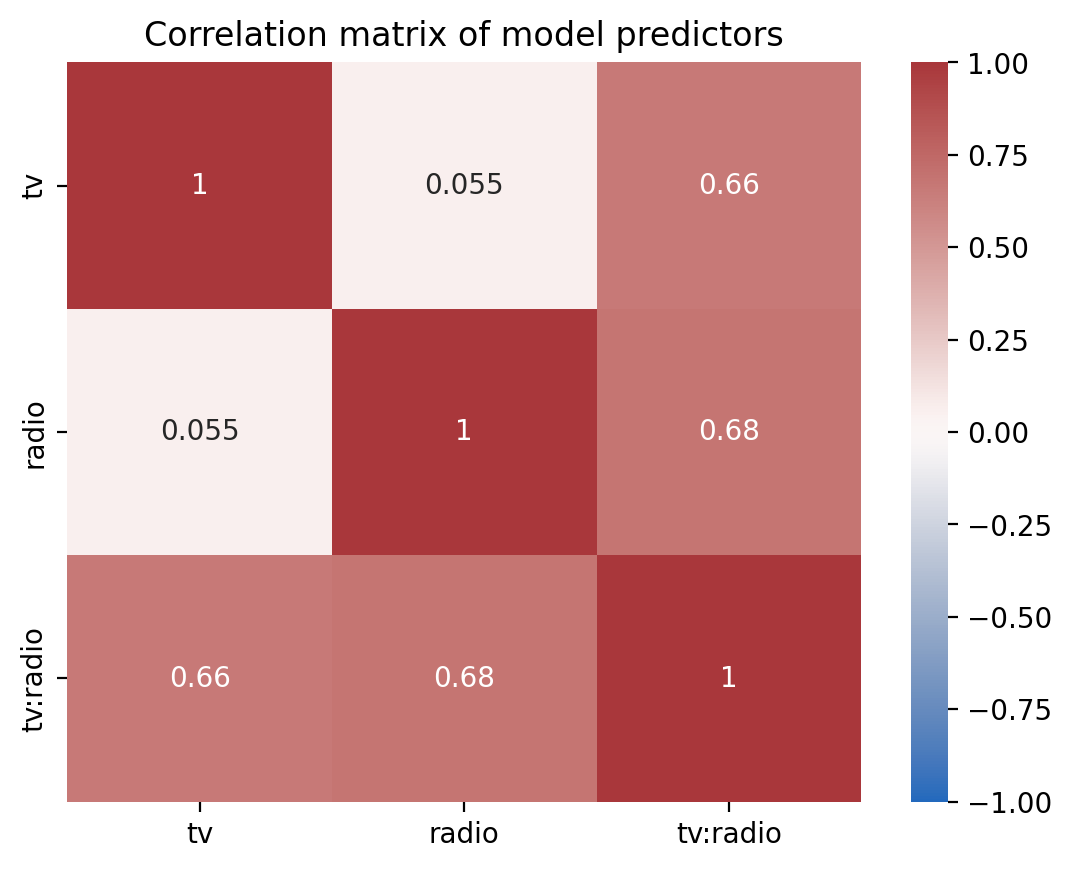

In [14]:
ax = sns.heatmap(
    with_interaction.design_matrix.drop("(Intercept)").corr(),
    cmap="vlag",
    center=0,
    vmin=-1,
    vmax=1,
    annot=True,
    xticklabels=with_interaction.design_matrix.columns[1:],
    yticklabels=with_interaction.design_matrix.columns[1:],
)
ax.set_title("Correlation matrix of model predictors");

And we can inspect the *variance inflation factor* of each term and the increased uncertainty of our estimates. The effect of multi-collinearity would increase the width of our confidence intervals by a factor of about ~2-2.5x

In [22]:
with_interaction.vif()

term,vif,ci_increase_factor
str,f64,f64
"""tv""",3.727848,1.930764
"""radio""",3.907651,1.976778
"""tv:radio""",6.93786,2.633982


In [128]:
# Note this visualization requires the altair package
# which is not installed by default

from altair import X, Y, Color, Scale

(
    with_interaction.vif()
    .plot.bar(
        y=Y("term").axis(title=("")),
        x=X("ci_increase_factor:Q", scale=Scale(domain=[.9, 2.7])).axis(
            title=("CI Increase by a Factor of"),
            format='~s',
            labelExpr="datum.label + 'x'"
        ),
        color=Color("vif:Q", scale=Scale(scheme="blues", domain=[1, 7])).title("VIF"),
    )
    .properties(height=100, width=400)
)

alt.Chart(...)

## Transforming Predictors

We could manually center our variable by creating new columns in our dataframe, but the `.set_transforms()` method can handle this for us!

Now our slopes for $\beta_0$, $\beta_1$, and $\beta_2$ are interpretable as other terms held at their *means*

:::{note}
*You can used `.unset_transforms()` to undo any transformations and reset variables to their original values and `.show_transforms()` to see what/if any variables have been transformed*
:::

In [21]:
with_interaction.set_transforms({"tv": "center", "radio": "center"})
with_interaction.fit(summary=True)

GT(_tbl_data=shape: (4, 9)
┌─────────────┬───────────┬───────────┬───────────┬───┬────────────┬─────┬─────────┬───────┐
│ term        ┆ estimate  ┆ std_error ┆ conf_low  ┆ … ┆ t_stat     ┆ df  ┆ p_value ┆ stars │
│ ---         ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---        ┆ --- ┆ ---     ┆ ---   │
│ str         ┆ f64       ┆ f64       ┆ f64       ┆   ┆ f64        ┆ i64 ┆ str     ┆ str   │
╞═════════════╪═══════════╪═══════════╪═══════════╪═══╪════════════╪═════╪═════════╪═══════╡
│ (Intercept) ┆ 13.946974 ┆ 0.066816  ┆ 13.815204 ┆ … ┆ 208.736882 ┆ 196 ┆ <.001   ┆ ***   │
│ tv          ┆ 0.044377  ┆ 0.000783  ┆ 0.042833  ┆ … ┆ 56.673066  ┆ 196 ┆ <.001   ┆ ***   │
│ radio       ┆ 0.188621  ┆ 0.004512  ┆ 0.179723  ┆ … ┆ 41.80596   ┆ 196 ┆ <.001   ┆ ***   │
│ tv:radio    ┆ 0.001086  ┆ 0.000052  ┆ 0.000983  ┆ … ┆ 20.726564  ┆ 196 ┆ <.001   ┆ ***   │
└─────────────┴───────────┴───────────┴───────────┴───┴────────────┴─────┴─────────┴───────┘, _body=<great_tables._gt_data.Body object at 0x33134a150>, _boxhead=Boxhead([ColInfo(var='term', type=<ColInfoTypeEnum.stub: 2>, column_label='term', column_align='left', column_width=None), ColInfo(var='estimate', type=<ColInfoTypeEnum.default: 1>, column_label='Estimate', column_align='right', column_width=None), ColInfo(var='std_error', type=<ColInfoTypeEnum.default: 1>, column_label='SE', column_align='right', column_width=None), ColInfo(var='conf_low', type=<ColInfoTypeEnum.default: 1>, column_label='CI-low', column_align='right', column_width=None), ColInfo(var='conf_high', type=<ColInfoTypeEnum.default: 1>, column_label='CI-high', column_align='right', column_width=None), ColInfo(var='t_stat', type=<ColInfoTypeEnum.default: 1>, column_label='T-stat', column_align='right', column_width=None), ColInfo(var='df', type=<ColInfoTypeEnum.default: 1>, column_label='df', column_align='right', column_width=None), ColInfo(var='p_value', type=<ColInfoTypeEnum.default: 1>, column_label='p', column_align='left', column_width=None), ColInfo(var='stars', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x331348b00>, _spanners=Spanners([]), _heading=Heading(title='Formula: lm(sales~tv*radio)', subtitle=Md(text='Number of observations: *200*  \n            Confidence intervals: *parametric*  \n            ---------------------  \n            R-squared: *0.9678*  \n            R-squared-adj: *0.9673*  \n            *F(3, 196) = 1963.057, p = <.001*  \n            Log-likelihood: *-270*  \n            AIC: *550* | BIC: *566*  \n            Residual error: *0.944*  \n        '), preheader=None), _stubhead=None, _source_notes=[Md(text='Signif. codes: *0 *** 0.001 ** 0.01 * 0.05 . 0.1*')], _footnotes=[], _styles=[StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=0, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=1, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=2, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=3, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)])], _locale=<great_tables._gt_data.Locale object at 0x331348500>, _formats=[<great_tables._gt_data.FormatInfo object at 0x30d4dd220>, <great_tables._gt_data.FormatInfo o

If we inspect the model's data we can see that it made a backup of the original data columns and replaced values with mean-centered values. This make it easy to keep the same model formula and transform your variables as needed.

In [22]:
with_interaction.data.glimpse()

Rows: 200
Columns: 12
$ tv         <f64> 83.0575, -102.54249999999999, -129.8425, 4.45750000000001, 33.75750000000002, -138.3425, -89.54249999999999, -26.842499999999987, -138.4425, 52.75750000000002
$ radio      <f64> 14.536000000000001, 16.036, 22.636000000000003, 18.036, -12.463999999999995, 25.636000000000003, 9.536000000000001, -3.6639999999999944, -21.163999999999994, -20.663999999999994
$ newspaper  <f64> 69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11.6, 1.0, 21.2
$ sales      <f64> 22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2, 4.8, 10.6
$ fitted     <f64> 21.686389994098406, 10.634545599203337, 9.261214108544735, 17.63410792693333, 12.636919029730022, 8.789897605877398, 10.844280097486708, 12.171526528493542, 6.994718246057654, 11.206063903969167
$ resid      <f64> 0.41361000590159236, -0.23454559920333828, 0.03878589145526057, 0.8658920730666715, 0.2630809702699821, -1.5898976058774013, 0.9557199025132928, 1.0284734715064587, -2.1947182460576498, -0.6060639039691598
$ hat       

And we've reduce the multi-collinearity between our predictors

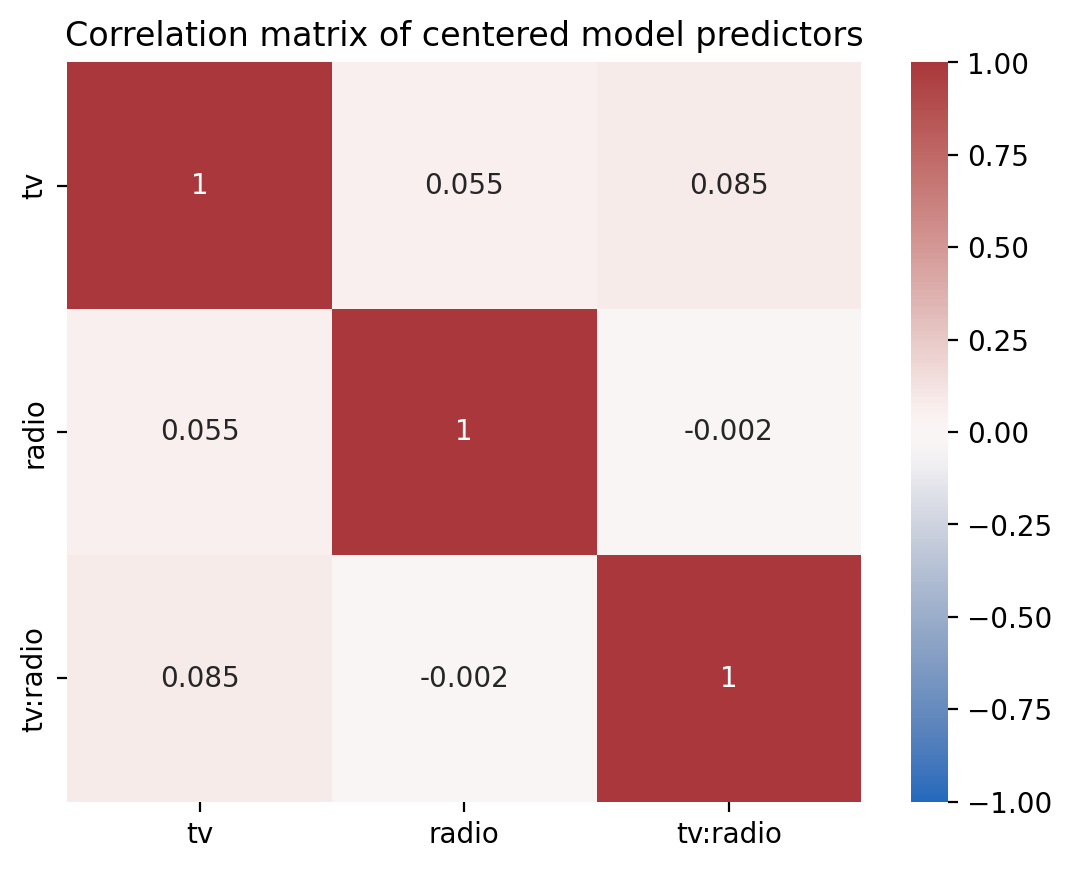

In [23]:
ax = sns.heatmap(
    with_interaction.design_matrix.drop("(Intercept)").corr(),
    cmap="vlag",
    center=0,
    vmin=-1,
    vmax=1,
    annot=True,
    xticklabels=with_interaction.design_matrix.columns[1:],
    yticklabels=with_interaction.design_matrix.columns[1:],
)
ax.set_title("Correlation matrix of centered model predictors");

And no increase in the variance inflation factor of our predictors

In [104]:
with_interaction.vif()

term,vif,ci_increase_factor
str,f64,f64
"""tv""",1.010291,1.005132
"""radio""",1.003058,1.001528
"""tv:radio""",1.007261,1.003624


In [ ]:
# Note this visualization requires the altair package
# which is not installed by default
(
    with_interaction.vif()
    .plot.bar(
        y=Y("term").axis(title=("")),
        x=X("ci_increase_factor:Q", scale=Scale(domain=[.9, 2.7])).axis(
            title=("CI Increase by a Factor of"),
            format='~s',
            labelExpr="datum.label + 'x'"
        ),
        color=Color("vif:Q", scale=Scale(scheme="blues", domain=[1, 7])).title("VIF"),
    )
    .properties(height=100, width=400)
)

alt.Chart(...)

Visualizing our marginal predictions show that the model with an interaction fits the data better as the relationship between $\text{Sales}$ and $\text{TV Ad Spending}$ *varies* across levels of $\text{Radio Ad Spending}$

In [ ]:
# Predict across the range of observed TV values at Radio values of 0, 20, and 40
marginal_predictions = model.empredict({"tv": "data", "radio": [0, 20, 40]})

:::{note}
By default `.empredict` allows you to specify values on the *original* scale of the predictors, because this is often easier to think about with respect to your data. You can disable this by setting `apply_transforms = False`, in which case you should pass values on the *transformed* scale, e.g. mean-centered scale `[0, 20, 40] - mean(radio)`
:::

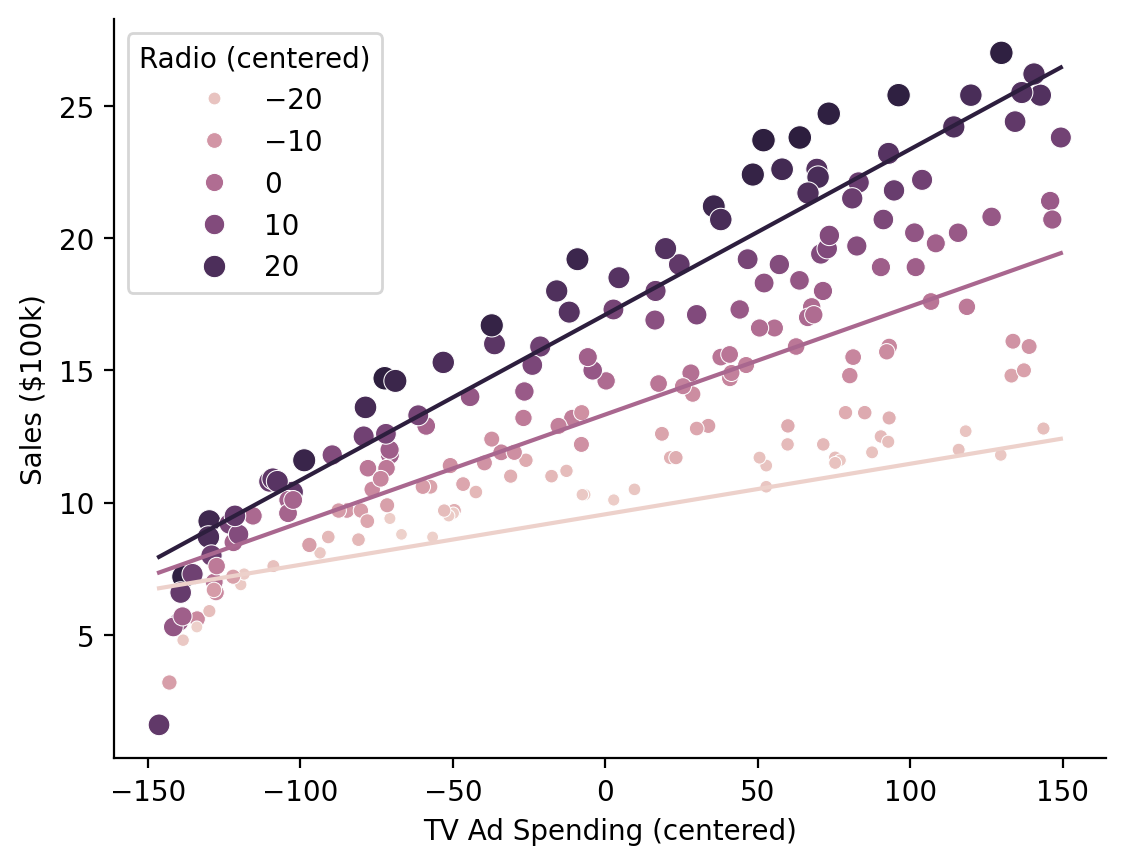

In [66]:
ax = sns.scatterplot(
    data=with_interaction.data,
    x="tv",
    y="sales",
    hue="radio",
    size="radio",
)

ax.legend(title='Radio (centered)')
ax = sns.lineplot(
    x="tv", y="prediction", hue="radio", errorbar=None, data=marginal_predictions, ax=ax, legend=False
)
ax.set(xlabel='TV Ad Spending (centered)', ylabel='Sales ($100k)');
sns.despine();

## Bootstrapped Confidence Intervals

It's easy to get a variety of bootstrapped confidence intervals for any model using `.fit(conf_method='boot')`

In [56]:
model.fit(conf_method="boot", nboot=500, summary=True)

GT(_tbl_data=shape: (3, 9)
┌─────────────┬──────────┬───────────┬──────────┬───┬───────────┬─────┬─────────┬───────┐
│ term        ┆ estimate ┆ std_error ┆ conf_low ┆ … ┆ t_stat    ┆ df  ┆ p_value ┆ stars │
│ ---         ┆ ---      ┆ ---       ┆ ---      ┆   ┆ ---       ┆ --- ┆ ---     ┆ ---   │
│ str         ┆ f64      ┆ f64       ┆ f64      ┆   ┆ f64       ┆ i64 ┆ str     ┆ str   │
╞═════════════╪══════════╪═══════════╪══════════╪═══╪═══════════╪═════╪═════════╪═══════╡
│ (Intercept) ┆ 2.9211   ┆ 0.29449   ┆ 2.196126 ┆ … ┆ 9.919193  ┆ 197 ┆ <.001   ┆ ***   │
│ tv          ┆ 0.045755 ┆ 0.00139   ┆ 0.041809 ┆ … ┆ 32.908708 ┆ 197 ┆ <.001   ┆ ***   │
│ radio       ┆ 0.187994 ┆ 0.00804   ┆ 0.168755 ┆ … ┆ 23.382446 ┆ 197 ┆ <.001   ┆ ***   │
└─────────────┴──────────┴───────────┴──────────┴───┴───────────┴─────┴─────────┴───────┘, _body=<great_tables._gt_data.Body object at 0x3418007d0>, _boxhead=Boxhead([ColInfo(var='term', type=<ColInfoTypeEnum.stub: 2>, column_label='term', column_align='left', column_width=None), ColInfo(var='estimate', type=<ColInfoTypeEnum.default: 1>, column_label='Estimate', column_align='right', column_width=None), ColInfo(var='std_error', type=<ColInfoTypeEnum.default: 1>, column_label='SE', column_align='right', column_width=None), ColInfo(var='conf_low', type=<ColInfoTypeEnum.default: 1>, column_label='CI-low', column_align='right', column_width=None), ColInfo(var='conf_high', type=<ColInfoTypeEnum.default: 1>, column_label='CI-high', column_align='right', column_width=None), ColInfo(var='t_stat', type=<ColInfoTypeEnum.default: 1>, column_label='T-stat', column_align='right', column_width=None), ColInfo(var='df', type=<ColInfoTypeEnum.default: 1>, column_label='df', column_align='right', column_width=None), ColInfo(var='p_value', type=<ColInfoTypeEnum.default: 1>, column_label='p', column_align='left', column_width=None), ColInfo(var='stars', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x346d5bc20>, _spanners=Spanners([]), _heading=Heading(title='Formula: lm(sales~tv+radio)', subtitle=Md(text='Number of observations: *200*  \n            Confidence intervals: *boot*  \n            Bootstrap Iterations: *500*  \n            ---------------------  \n            R-squared: *0.8972*  \n            R-squared-adj: *0.8962*  \n            *F(2, 197) = 859.618, p = <.001*  \n            Log-likelihood: *-386*  \n            AIC: *780* | BIC: *793*  \n            Residual error: *1.681*  \n        '), preheader=None), _stubhead=None, _source_notes=[Md(text='Signif. codes: *0 *** 0.001 ** 0.01 * 0.05 . 0.1*')], _footnotes=[], _styles=[StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=0, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=1, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=2, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)])], _locale=<great_tables._gt_data.Locale object at 0x3418dfbf0>, _formats=[<great_tables._gt_data.FormatInfo object at 0x3418a0aa0>, <great_tables._gt_data.FormatInfo object at 0x17782f320>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='tab

Individual bootstraps are stored in the `.result_boots` attribute of the model by default (you can control this with `save_boots=False`), which makes it easy to create visualizations:

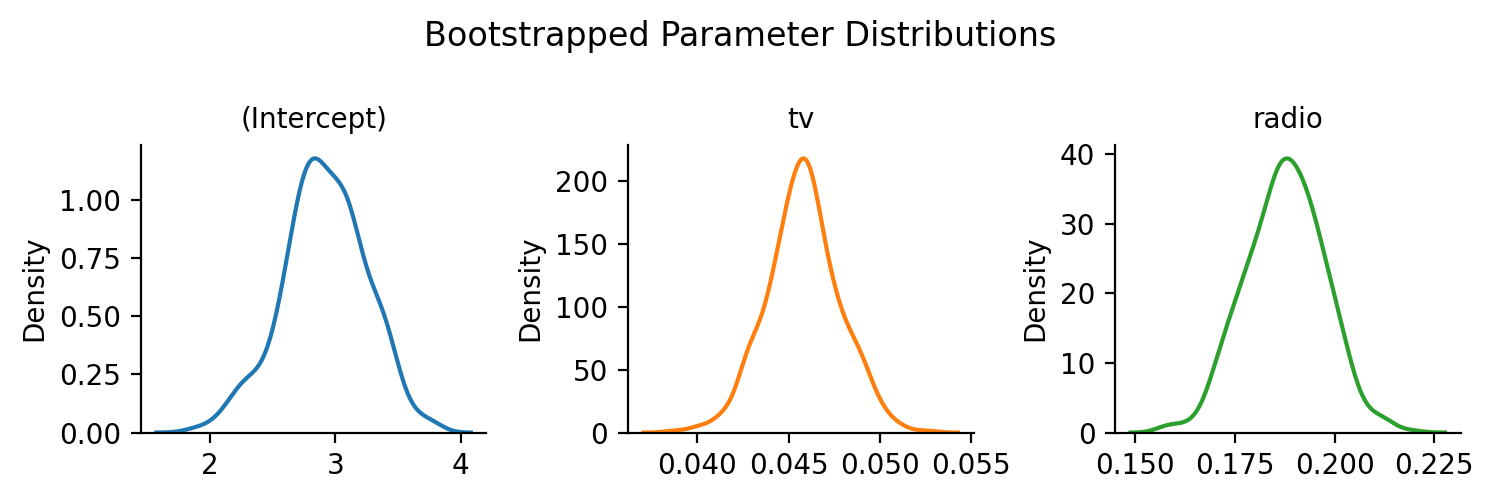

In [58]:
grid = sns.FacetGrid(data=model.result_boots.unpivot(), col='variable', hue='variable', sharex=False, sharey=False, height=2.5)
grid.map(sns.kdeplot, 'value')
grid.set_xlabels('')
grid.set_titles("{col_name}")
grid.figure.suptitle("Bootstrapped Parameter Distributions")
grid.figure.tight_layout();

## Simulating from the model

Simulating new datasets, i.e. new $Sales$ from a model is just as easy

In [59]:
# Simulate 3 datasets
new_data = model.simulate(n=3)
new_data.head()

sim_1,sim_2,sim_3
f64,f64,f64
19.50217,21.243817,22.361988
12.654133,15.184968,15.532642
10.932024,15.004646,11.323162
20.299359,17.060741,16.959926
13.77793,9.381602,12.524089
